In [1]:
print("==============================================")

#实验一 计算
print("实验1数据")
# 导入所需库
import pandas as pd
import math

# 定义数据：测量编号、振幅θ(deg)、周期T₀(sec)
data = {
    "Ex1_No.": list(range(1, 21)),
    "Ex1_θ(deg)": [120, 125, 134, 133, 129, 137, 140, 139, 134, 132, 130, 129, 129, 128, 126, 122, 119, 117, 113, 112],
    "Ex1_T₀(sec)": [1.572, 1.572, 1.571, 1.571, 1.571, 1.571, 1.571, 1.571, 1.570, 1.570, 1.570, 1.570, 1.570, 1.570, 1.570,
                    1.570, 1.569, 1.569, 1.569, 1.569]
}

# 将数据转换为DataFrame格式
df = pd.DataFrame(data)

# 计算T₀的平均值和标准偏差
average_T0 = df["Ex1_T₀(sec)"].mean()
std_T0 = df["Ex1_T₀(sec)"].std()

# 计算自然频率ω₀
omega_0 = 2 * math.pi / average_T0

# 输出计算结果
print(f"平均自然周期 T₀: {average_T0:.4f} sec")
print(f"T₀的标准偏差: {std_T0:.5f} sec")
print(f"自然频率 ω₀: {omega_0:.4f} rad/sec")

print("==============================================")

#实验2
print("实验2数据")
# 导入所需库
import pandas as pd

# 定义实验二的振幅数据和对数衰减值
experiment_data = {
    "theta_i": [139, 127, 116, 107, 98],  # 前五个振幅值
    "ln_decay": [0.434664263, 0.437468, 0.436102, 0.438722, 0.441833]
}

# 将数据转换为DataFrame格式
df_experiment = pd.DataFrame(experiment_data)

# 假设 average_T0 是之前实验计算出的平均周期T₀
average_T0 = 1.5703  # 示例值，应使用实际计算结果

# 根据更新的公式计算每组数据的阻尼系数β
df_experiment["Ex2_beta"] = df_experiment["ln_decay"] / (5 * average_T0)

# 计算阻尼系数β的平均值
beta_average_updated = df_experiment["Ex2_beta"].mean()

# 输出β的平均值和完整的实验数据
print(f"阻尼系数 β 的平均值: {beta_average_updated:.5f}")
print(df_experiment)


print("==============================================")

#实验3
print("实验3数据")


import pandas as pd
import numpy as np

# 使用实验1中的自然频率 omega_0 和实验2中的阻尼系数 beta_average
omega_0 = 4.0013  # 这个值需要你从实验1的结果中获取
beta_average = 0.05575  # 这个值需要你从实验2的结果中获取

# 实验3的数据，根据你的实际数据进行了填充
experiment_3_data = {
    "potentiometer_scale": np.arange(0, 10.5, 0.5),  # 电位器刻度
    "T_sec": [1.5032, 1.5043, 1.5061, 1.5052, 1.5058, 1.5059, 1.5067, 1.5066, 1.5077, 1.5085,
              1.5086, 1.5103, 1.5105, 1.5121, 1.5125, 1.5141, 1.5145, 1.5164, 1.5168, 1.5181, 1.5185],  # 电机振动周期T (sec)
    "theta_deg": [50, 51, 51, 50, 51, 52, 53, 53, 53, 53, 51, 53, 53, 54, 54, 55, 57, 57, 58, 59, 60],  # 振幅θ (deg)
    "phi_deg": [162, 161, 160, 163, 160, 159, 158, 158, 160, 161, 161, 159, 158, 159, 159, 158, 159, 158, 157, 157, 156],  # 相位φ (deg)
}

# 创建DataFrame
df_experiment_3 = pd.DataFrame(experiment_3_data)

# 计算每个刻度下的驱动频率ω
df_experiment_3['omega'] = 2 * np.pi / df_experiment_3['T_sec']


# 计算稳态振动振幅θs
df_experiment_3['theta_s'] = 1 / np.sqrt((omega_0**2 - df_experiment_3['omega']**2)**2 + 
                                          (4 * beta_average**2 * df_experiment_3['omega']**2))

# 将振幅从弧度转换为度
df_experiment_3['theta_s_deg'] = np.degrees(df_experiment_3['theta_s'])

# 打印结果

print(df_experiment_3[['potentiometer_scale', 'T_sec', 'theta_deg', 'phi_deg', 'omega', 'theta_s_deg']])

T_average = np.mean(df_experiment_3['T_sec']
)

# 根据T的平均值计算omega (驱动频率)
omega = 2 * np.pi / T_average

# 打印结果
print(f"电机振动周期T的平均值: {T_average} sec")
print(f"根据平均值计算出的omega (驱动频率): {omega} rad/sec")



实验1数据
平均自然周期 T₀: 1.5703 sec
T₀的标准偏差: 0.00092 sec
自然频率 ω₀: 4.0013 rad/sec
实验2数据
阻尼系数 β 的平均值: 0.05575
   theta_i  ln_decay  Ex2_beta
0      139  0.434664  0.055361
1      127  0.437468  0.055718
2      116  0.436102  0.055544
3      107  0.438722  0.055877
4       98  0.441833  0.056274
实验3数据
    potentiometer_scale   T_sec  theta_deg  phi_deg     omega  theta_s_deg
0                   0.0  1.5032         50      162  4.179873    37.363347
1                   0.5  1.5043         51      161  4.176817    37.967949
2                   1.0  1.5061         51      160  4.171825    38.995414
3                   1.5  1.5052         50      163  4.174319    38.475622
4                   2.0  1.5058         51      160  4.172656    38.820778
5                   2.5  1.5059         52      159  4.172379    38.878836
6                   3.0  1.5067         53      158  4.170163    39.348876
7                   3.5  1.5066         53      158  4.170440    39.289573
8                   4.0  1.5077  

In [10]:
import numpy as np
import math

# 已知值从之前的实验结果
omega_0 = 4.0013  # 自然频率 (rad/sec)
beta_average = 0.05575  # 平均阻尼系数

# 实验3的数据
T_sec = np.array([1.5101, 1.5129, 1.5137, 1.5253, 1.5323, 1.5359, 1.5449, 1.5516, 1.5570, 1.5638, 1.5703, 1.5769, 1.5839, 1.5902, 1.5984, 1.6031, 1.6087, 1.6101, 1.6232, 1.6299, 1.6381])
omega = 2 * math.pi / T_sec  # 激励频率

# 假设外力激励的幅值 m = 1
m = 1
theta_s = m / np.sqrt((omega_0**2 - omega**2)**2 + (4 * beta_average**2 * omega**2))
phi = np.arctan((2 * beta_average * omega) / (omega_0**2 - omega**2))
phi_deg = np.degrees(phi)  # 转换相位差为度

# 打印结果
for i in range(len(T_sec)):
    print(f"电机振动周期 {T_sec[i]:.4f} sec -> ω: {omega[i]:.4f} rad/sec, θ_s: {theta_s[i]:.4f}, φ: {phi_deg[i]:.2f}°")


电机振动周期 1.5101 sec -> ω: 4.1608 rad/sec, θ_s: 0.7237, φ: -19.62°
电机振动周期 1.5129 sec -> ω: 4.1531 rad/sec, θ_s: 0.7568, φ: -20.51°
电机振动周期 1.5137 sec -> ω: 4.1509 rad/sec, θ_s: 0.7667, φ: -20.78°
电机振动周期 1.5253 sec -> ω: 4.1193 rad/sec, θ_s: 0.9410, φ: -25.61°
电机振动周期 1.5323 sec -> ω: 4.1005 rad/sec, θ_s: 1.0816, φ: -29.64°
电机振动周期 1.5359 sec -> ω: 4.0909 rad/sec, θ_s: 1.1676, φ: -32.18°
电机振动周期 1.5449 sec -> ω: 4.0670 rad/sec, θ_s: 1.4329, φ: -40.52°
电机振动周期 1.5516 sec -> ω: 4.0495 rad/sec, θ_s: 1.6798, φ: -49.33°
电机振动周期 1.5570 sec -> ω: 4.0354 rad/sec, θ_s: 1.8975, φ: -58.62°
电机振动周期 1.5638 sec -> ω: 4.0179 rad/sec, θ_s: 2.1397, φ: -73.46°
电机振动周期 1.5703 sec -> ω: 4.0013 rad/sec, θ_s: 2.2414, φ: 89.96°
电机振动周期 1.5769 sec -> ω: 3.9845 rad/sec, θ_s: 2.1549, φ: 73.21°
电机振动周期 1.5839 sec -> ω: 3.9669 rad/sec, θ_s: 1.9219, φ: 58.22°
电机振动周期 1.5902 sec -> ω: 3.9512 rad/sec, θ_s: 1.6834, φ: 47.87°
电机振动周期 1.5984 sec -> ω: 3.9309 rad/sec, θ_s: 1.4089, φ: 38.14°
电机振动周期 1.6031 sec -> ω: 3.9194 rad/sec, θ_s: 

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

实验1数据
平均自然周期 T₀: 1.5703 sec
T₀的标准偏差: 0.00092 sec
自然频率 ω₀: 4.0013 rad/sec
实验2数据
阻尼系数 β 的平均值: 0.05575
   theta_i  ln_decay  Ex2_beta
0      139  0.434664  0.055361
1      127  0.437468  0.055718
2      116  0.436102  0.055544
3      107  0.438722  0.055877
4       98  0.441833  0.056274
实验3数据
电机振动周期T的平均值: 1.570490476190476 sec
根据平均值计算出的omega (驱动频率): 4.000778993846973 rad/sec
omega(r): 4.000523161412767
    potentiometer_scale   T_sec  theta_deg  phi_deg     omega  omega / omega_r
0                   0.0  1.5101         34      168  4.160774         1.040058
1                   0.5  1.5129         34      167  4.153074         1.038133
2                   1.0  1.5137         36      167  4.150879         1.037584
3                   1.5  1.5253         40      165  4.119311         1.029693
4                   2.0  1.5323         44      164  4.100493         1.024989
5                   2.5  1.5359         49      162  4.090882         1.022587
6                   3.0  1.5449         56 

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

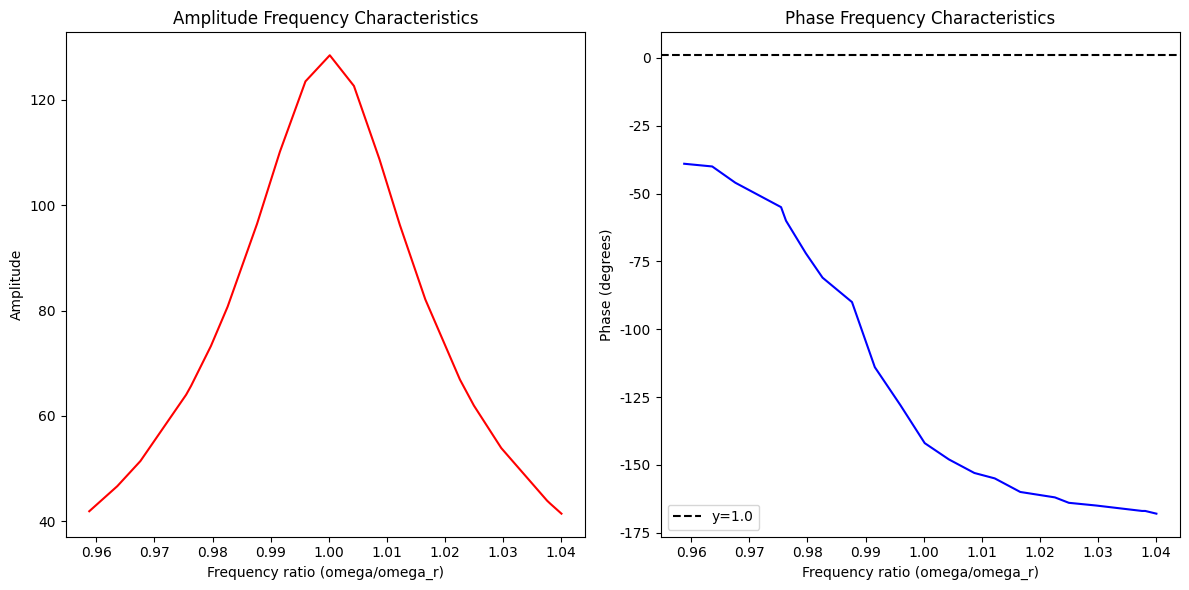

In [29]:
print("==============================================")

#实验一 计算
print("实验1数据")
# 导入所需库
import pandas as pd
import math

# 定义数据：测量编号、振幅θ(deg)、周期T₀(sec)
data = {
    "Ex1_No.": list(range(1, 21)),
    "Ex1_θ(deg)": [120, 125, 134, 133, 129, 137, 140, 139, 134, 132, 130, 129, 129, 128, 126, 122, 119, 117, 113, 112],
    "Ex1_T₀(sec)": [1.572, 1.572, 1.571, 1.571, 1.571, 1.571, 1.571, 1.571, 1.570, 1.570, 1.570, 1.570, 1.570, 1.570, 1.570,
                    1.570, 1.569, 1.569, 1.569, 1.569]
}

# 将数据转换为DataFrame格式
df = pd.DataFrame(data)

# 计算T₀的平均值和标准偏差
average_T0 = df["Ex1_T₀(sec)"].mean()
std_T0 = df["Ex1_T₀(sec)"].std()

# 计算自然频率ω₀
omega_0 = 2 * math.pi / average_T0

# 输出计算结果
print(f"平均自然周期 T₀: {average_T0:.4f} sec")
print(f"T₀的标准偏差: {std_T0:.5f} sec")
print(f"自然频率 ω₀: {omega_0:.4f} rad/sec")

print("==============================================")

#实验2
print("实验2数据")
# 导入所需库
import pandas as pd

# 定义实验二的振幅数据和对数衰减值
experiment_data = {
    "theta_i": [139, 127, 116, 107, 98],  # 前五个振幅值
    "ln_decay": [0.434664263, 0.437468, 0.436102, 0.438722, 0.441833]
}

# 将数据转换为DataFrame格式
df_experiment = pd.DataFrame(experiment_data)

# 假设 average_T0 是之前实验计算出的平均周期T₀
average_T0 = 1.5703  # 示例值，应使用实际计算结果

# 根据更新的公式计算每组数据的阻尼系数β
df_experiment["Ex2_beta"] = df_experiment["ln_decay"] / (5 * average_T0)

# 计算阻尼系数β的平均值
beta_average_updated = df_experiment["Ex2_beta"].mean()

# 输出β的平均值和完整的实验数据
print(f"阻尼系数 β 的平均值: {beta_average_updated:.5f}")
print(df_experiment)


print("==============================================")

#实验3
print("实验3数据")


import pandas as pd
import numpy as np

# 使用实验1中的自然频率 omega_0 和实验2中的阻尼系数 beta_average
omega_0 = 4.0013  # 这个值需要你从实验1的结果中获取
beta_average = 0.05575  # 这个值需要你从实验2的结果中获取

# 实验3的数据，根据你的实际数据进行了填充
experiment_3_data = {
    "potentiometer_scale": np.arange(0, 10.5, 0.5),  # 电位器刻度
    "T_sec": [1.5101, 1.5129, 1.5137, 1.5253, 1.5323, 1.5359, 1.5449, 1.5516, 1.5570, 1.5638, 1.5703, 1.5769, 1.5839, 1.5902, 1.5984, 1.6031, 1.6087, 1.6101, 1.6232, 1.6299, 1.6381],  # 电机振动周期T (sec)
    "theta_deg": [34, 34, 36, 40, 44, 49, 56, 62, 71, 83, 101, 117, 128, 131, 126, 119, 107, 96, 85, 77, 77],  # 振幅θ (deg)
    "phi_deg": [168, 167, 167, 165, 164, 162, 160, 155, 153, 148, 142, 128, 114, 90, 81, 72, 60, 55, 46, 40, 39],  # 相位φ (deg)
}

# 创建DataFrame
df_experiment_3 = pd.DataFrame(experiment_3_data)

# 计算每个刻度下的驱动频率ω
df_experiment_3['omega'] = 2 * np.pi / df_experiment_3['T_sec']


# 计算稳态振动振幅θs
df_experiment_3['theta_s'] = 1 / np.sqrt((omega_0**2 - df_experiment_3['omega']**2)**2 + 
                                          (4 * beta_average**2 * df_experiment_3['omega']**2))

# 将振幅从弧度转换为度
df_experiment_3['theta_s_deg'] = np.degrees(df_experiment_3['theta_s'])



# 打印结果

#print(df_experiment_3[['potentiometer_scale', 'T_sec', 'theta_deg', 'phi_deg', 'omega', 'theta_s_deg']])

T_average = np.mean(df_experiment_3['T_sec']
)

# 根据T的平均值计算omega (驱动频率)
omega = 2 * np.pi / T_average

# 打印结果
print(f"电机振动周期T的平均值: {T_average} sec")
print(f"根据平均值计算出的omega (驱动频率): {omega} rad/sec")


print("========================")

import math

# 已知的自然频率和阻尼系数
omega_0 = 4.0013  # 自然频率 (rad/sec)
beta = 0.05575  # 阻尼系数

# 计算 omega(r)
omega_r = math.sqrt(omega_0**2 - 2*beta**2)

# 输出结果
print("omega(r):", omega_r)


df_experiment_3['omega_R'] = omega_r
df_experiment_3['omega / omega_r'] = df_experiment_3['omega'] / omega_r
print(df_experiment_3[['potentiometer_scale', 'T_sec', 'theta_deg', 'phi_deg', 'omega', 'omega / omega_r']])






# 生成幅频特性曲线和相频特性曲线
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(df_experiment_3['omega']/df_experiment_3['omega_R'], df_experiment_3['theta_s_deg'], 'r-')
plt.title('Amplitude Frequency Characteristics')
plt.xlabel('Frequency ratio (omega/omega_r)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(df_experiment_3['omega']/df_experiment_3['omega_R'], -(df_experiment_3['phi_deg']), 'b-')
plt.title('Phase Frequency Characteristics')
plt.xlabel('Frequency ratio (omega/omega_r)')
plt.ylabel('Phase (degrees)')


# 在图表中添加纵坐标为1.0的水平线
plt.axhline(y=1.0, color='k', linestyle='--', label='y=1.0')

# 显示图例
plt.legend()

plt.tight_layout()
plt.show()
